In [1]:
'''
Data Science Assignment 3
Umar Khattak (uk50)
Matthew Lieberman (mrl196)

Problem 1: EU Cities
Temperatures Dataset (72 Points)

Given a CSV data file as represented by the sample file 
EuCitiesTemperatures.csv  Download EuCitiesTemperatures.csv (213 records), 
load it into a Pandas DataFrame and perform the following tasks on it.
'''
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('EuCitiesTemperatures.csv')

In [7]:
'''
Preprocessing/Analysis (28 pts)

1. [9 pts] Fill in the missing latitude and longitude values by 
calculating the average for that country. Round the average to 2 decimal places.
'''
df['longitude']=df.groupby('country')['longitude'].transform(lambda x: x.fillna(x.mean())).round(2)
df['latitude']=df.groupby('country')['latitude'].transform(lambda x: x.fillna(x.mean())).round(2)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [8]:
'''
2. [9 pts] Find out the subset of cities that lie between latitudes 40 to 60 
(both inclusive) and longitudes 15 to 30 (both inclusive). Find out which 
countries have the maximum number of cities in this geographical band. 
(More than one country could have the maximum number of values.)
'''
geoRange = df[df['latitude'].between(40,60,inclusive=True)&df['longitude'].between(15,30,inclusive=True)]
mostCities = geoRange.groupby('country').count()['city'].sort_values(ascending=False).to_frame('city amounts')
mostCities[mostCities['city amounts']==mostCities.iloc[0,0]]

,city amounts
country,
Romania,9
Poland,9


In [9]:
'''
3. [10 pts] Fill in the missing temperature values by the average temperature 
value of the similar region type. A region type would be a combinaton of 
whether it is in EU (yes/no) and whether it has a coastline (yes/no).
For example, if we have a missing temperature value for Bergen, Norway, 
which is not in the EU but lies on the coast, we will fill it with the average 
temperature of cities with EU='no' and coastline='yes')
'''
df['temperature'] = df.groupby(['EU','coastline'])['temperature'].transform(lambda x: x.fillna(x.mean())).round(2)
df

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


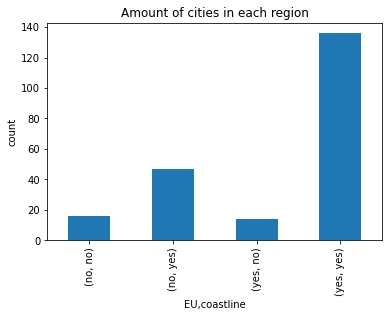

In [10]:
'''
Visualization (27 pts)
For all plots, make sure to label the axes, and set appropriate tick labels.

1. [6 pts] Plot a bar chart for the number of cities belonging to each of the 
regions described in Preprocessing/Analysis #3 above.
'''
df_region = df.groupby(['EU','coastline']).count()['city'].to_frame('city amounts')
plt.figure()
plt.title('Amount of cities in each region')
plt.ylabel('count')
df_region['city amounts'].plot(kind='bar')
plt.show()

AttributeError: 'PathCollection' object has no property 'hue'

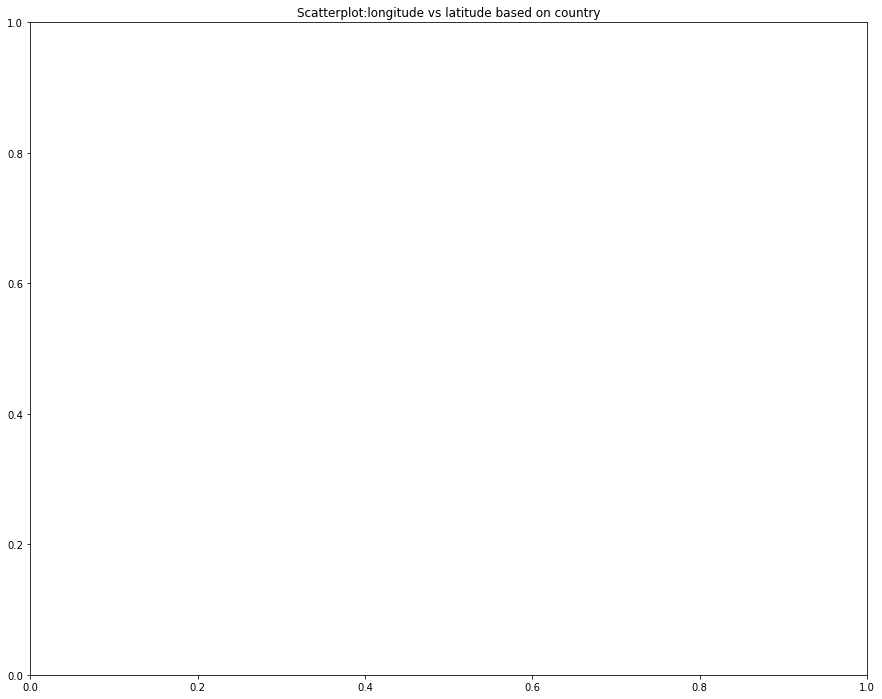

In [11]:
'''
2. [7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) 
values to get a map-like visual of the cities under consideration. All the 
cities in the same country should have the same color.
'''
plt.figure(figsize=(15, 12))
plt.title('Scatterplot:longitude vs latitude based on country')
plt.scatter(df['longitude'], df['latitude'], s=100, hue=df['country'])
#df_region['city amounts'].plot(kind='bar')

plt.show()

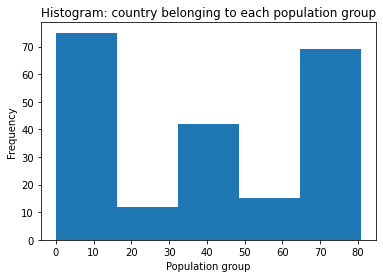

In [12]:
'''
3. [6 pts] The population column contains values unique to each country. 
So two cities of the same country will show the same population value. 
Plot a histogram of the number of countries belonging to each population group: 
split the population values into 5 bins (groups).
'''
plt.figure()
plt.title('Histogram: country belonging to each population group')
plt.xlabel('Population group')
plt.ylabel('Frequency')
plt.hist(df['population'], bins=5)
plt.show()

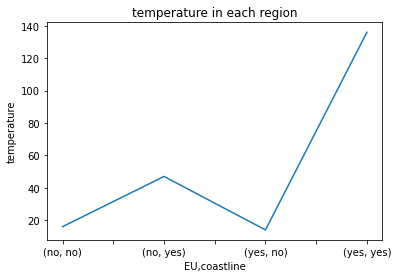

In [38]:
'''
4. [8 pts] Plot subplots (2, 2), with proper titles, 
one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), 
where the color of the plot points should be based on the temperature values: 
‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange 
for temperatures between 6 and 10 (both inclusive). For each subplot, set 
xticks to an array of numbers from 0 to n-1 (both inclusive), where n is 
the total number of cities in each region type. This represents each city 
as a number between 0 and n-1.
'''
temperatureRegions = df.groupby(['EU','coastline']).count()['temperature'].to_frame('temperature')
plt.figure()
plt.title('temperature in each region')
plt.ylabel('temperature')
temperatureRegions['temperature'].plot(subplots=True)
plt.show()